<h1><center>The Thera Bank Personal Loan Campaign Project</center></h1>
<h4><i><center>Data Analysis and Modelling by: Varun Kulkarni (kulkarnivarun@outlook.com) </center></i></h4>



## Context
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

## Data Description
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

## Objective
The classification goal is to predict the likelihood of a liability customer buying personal loans.

## Data Source
Bank_Personal_Loan_Modelling.csv

## Tasks
1. [Initial Setup: getting familiar with the data (5 Marks)](#1)
2. [Exploratory Data Analysis (20 Marks)](#2)
3. [Split the data for training and test (70:30) (5 marks)](#3)
4. [Use Logistic Regression to predict and print all metrics (15 marks)](#4)
5. [Reasoning on how can the model perform better (10 Marks)](#5)
6. [Business understanding of the improved model (5 marks)](#6)

### 1. Initial Setup (5 Marks)<a class="anchor" id='1'></a>
Import the datasets and libraries, check data types, statistical summary, shape, null values or incorrect imputation.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set(color_codes=True)
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Import dataset
bank_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Check datatypes and related information for bank data
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### *Observation*: 
All the data types look numerical!

In [4]:
# Statistical summary of bank data
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [5]:
# Shape of the dataset
print("There are {0} records and {1} variables.".format(bank_data.shape[0], bank_data.shape[1]))

There are 5000 records and 14 variables.


In [6]:
# Check for null values
if bank_data.isnull().values.any():
    print("Null values found!")
else:
    print("No null values found!")

No null values found!


In [7]:
# Check for NA values
if bank_data.isna().values.any():
    print("NA values found!")
else:
    print("No NA values found!")

No NA values found!


In [8]:
# Check for duplicated values
print("Number of duplicated records: ", bank_data.duplicated().sum())

Number of duplicated records:  0


#### *Observations* :
1. There are no missing or null values in the dataset.
2. Incorrect imputations: Minimum value of experience is negative. This implies there must be incorrect values for Experience.
3. There are no duplicated values.

### 2. Exploratory Data Analysis (20 marks)  <a class="anchor" id='2'></a>
Study the data distribution in each attribute and target variable, share your findings 

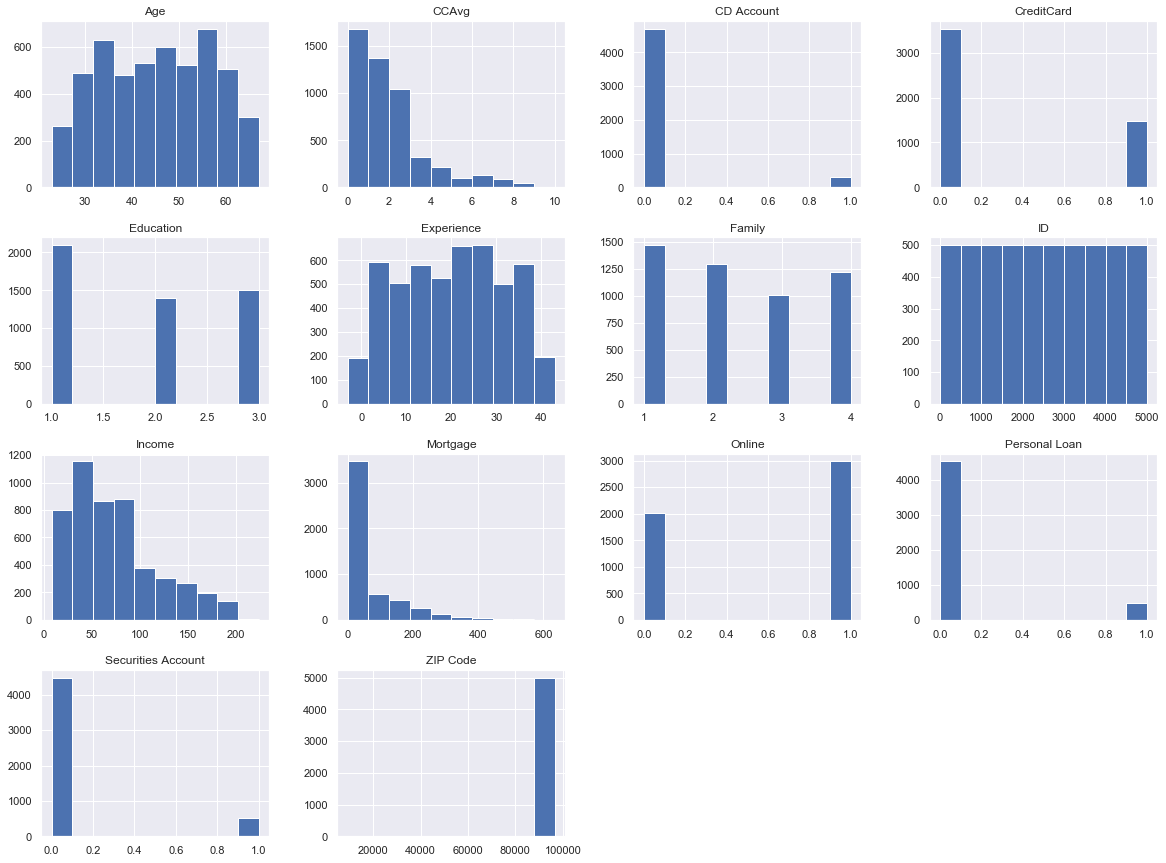

In [9]:
# Let's look at the distribution of each attribute
bank_data.hist(figsize=(20,15))
plt.show()

#### *Initial Observations* :
**Parameters**:
1. **ID**: Equally spaced categories making it a numerical variable.
2. **Age**: Three peaks indicate there are three ages that are more in numbers. Looks ordinal variable, but the categories are equally spaced, making it numerical. 
3. **Experience**: Good number of people with experience ranging from 5 to 35 years are included in this dataset. There seems to be negative values which needs to be fixed. Looks ordinal variable, but the categories are equally spaced, making it numerical.
4. **Income**: It seems low income customers are more in this dataset. This implies the income data is right skewed. It's a numerical variable.
5. **ZIP Code**: Single peak indicates data collected is from a certain geographic location. It's a categorical variable.
6. **Family** : There are four peaks indicating four categories. Categories can be ordered, making it a ordinal variable.
7. **CC Avg**: Uneven credit card spending among the customers in this dataset. It's a numerical variable. 
8. **Education**: There are three peaks indicating three categories. The categories can be ordered making it a ordinal variable.
8. **Mortgage** : Very uneven distribution in the dataset. Lot of customers without a mortgage. It's a numerical variable.
8. **Securities Account**: Significant number of customers do not have securities account with the bank. Categorical variable. 
9. **CD Account**: A lot of customers do not have a certificate of deposit account with the bank. Categorical variable.
10. **Online**: Lot of customers have Internet banking facilities. Categorical variable.
11. **Credit Card** : Significant number of customers do not use a credit card issued by the bank. Categorical variable.

**Target Variable**: Personal Loan - the distribution depicts that a significant amount of people did not opt for the personal loan offered in previous campaign. 

#### Number of uniques in each column

In [10]:
bank_data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

#### *Observations* :
1. Each customer has unique ID.
2. Categorical variables: Securities Account, CD Account, Online, Credit Card, Personal Loan, ZIP Code.
3. Ordinal variables: Family and Education.
4. Numerical (continuous): Age, Experience, Income, CCAvg, Mortgage.

#### Number of people with zero mortgage

In [11]:
print("Number of people with zero mortgage: ", bank_data[bank_data.Mortgage == 0].shape[0])

Number of people with zero mortgage:  3462


#### *Observation*:
There are significant amount of customers (69.24%) who have no mortgage!

#### Number of people with zero credit card spending per month

In [12]:
print("Number of people with zero credit card spending per month: ", 
     bank_data[bank_data.CCAvg == 0.0].shape[0])

Number of people with zero credit card spending per month:  106


#### *Observation*:
Very few people have zero credit card spending per month.

#### Value counts of all categorical columns

In [13]:
# Personal loan: Did this customer accept the personal loan offered in the last campaign?
bank_data['Personal Loan'].value_counts(dropna=False).to_frame()

,Personal Loan
0,4520
1,480


In [14]:
# Securities Account - Does the customer have a securities account with the bank?
bank_data['Securities Account'].value_counts().to_frame()

,Securities Account
0,4478
1,522


In [15]:
# CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
bank_data['CD Account'].value_counts().to_frame()

,CD Account
0,4698
1,302


In [16]:
# Online: Does the customer use internet banking facilities?
bank_data['Online'].value_counts().to_frame()

,Online
1,2984
0,2016


In [17]:
# CreditCard: Does the customer use a credit card issued by the bank?
bank_data['CreditCard'].value_counts().to_frame()

,CreditCard
0,3530
1,1470


In [18]:
# ZIP Code: Home Address ZIP code
bank_data['ZIP Code'].value_counts().to_frame().T

,94720,94305,95616,90095,93106,92037,93943,91320,91711,94025,...,94404,94965,9307,91024,92694,96145,94970,94598,90068,94087
ZIP Code,169,127,116,71,57,54,54,53,52,52,...,1,1,1,1,1,1,1,1,1,1


In [19]:
# For the sake of this study, let's consider Education and Family as loosely categorical variable!

# Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
bank_data['Education'].value_counts().to_frame()

,Education
1,2096
3,1501
2,1403


In [20]:
# Family: Family size of the customer
bank_data['Family'].value_counts().to_frame()

,Family
1,1472
2,1296
4,1222
3,1010


#### *Observations*:
1. Only 9.6% customers opted for Personal Loan.
2. Only 10.44% had securities account.
3. Only 6.04% had certificate of deposit account.
4. More than half (59.68%) had Internet banking facilities.
5. Only 29.4% of the customers used credit cards.
6. Based on ZIP Code data, it seems most of data is collected from few geographical areas close together. This dataset would not represent the trends from other branch locations.
7. There are more one person families as compared to two, three or four people families in this dataset.
8. There are more undergraduates than graduates or advance degree professionals in the dataset.

#### Univariate and Bivariate Analysis

##### Univariate analysis 
Let's take a closer look at the distributions of continuous variables.

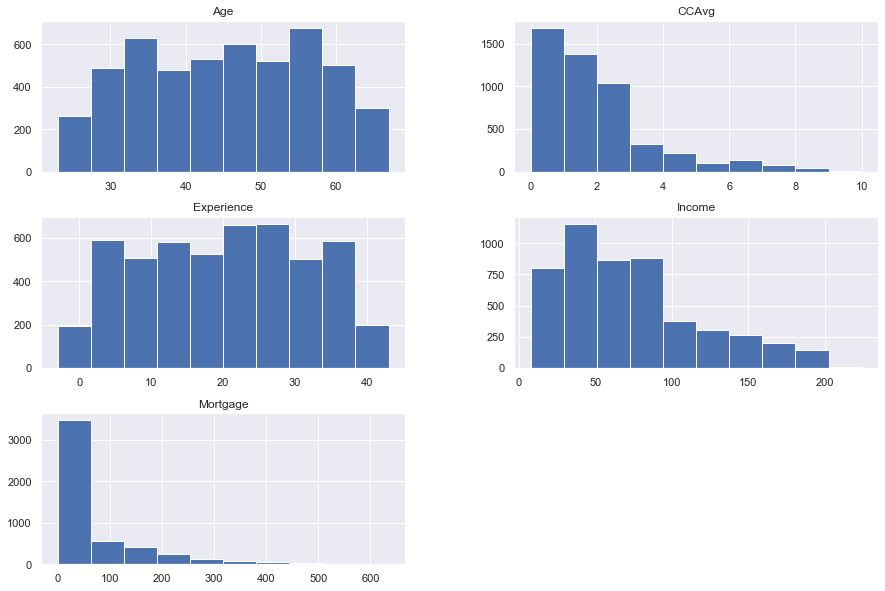

In [21]:
bank_data[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']].hist(figsize=(15,10));

In [22]:
# Let's look at the skewness for these variables
skewed_variables = ['Age','Experience','Income','CCAvg','Mortgage']
skewness_dict = {'Skewness Value': [stats.skew(bank_data.Age),
                               stats.skew(bank_data.Experience),
                               stats.skew(bank_data.Income),
                               stats.skew(bank_data.CCAvg),
                               stats.skew(bank_data.Mortgage)]}
                      
skewness_df = pd.DataFrame(skewness_dict, index=skewed_variables)
skewness_df

,Skewness Value
Age,-0.029332
Experience,-0.026317
Income,0.841086
CCAvg,1.597964
Mortgage,2.103371


#### *Observations*:
1. Age and Education are not skewed as much and follow a fairly normal distribution.
2. Mortgage is highly skewed!
3. Income and CCAvg are reasonably skewed.
4. We may have to treat Mortgage, Income and CCAvg, as we prepare data for modeling.

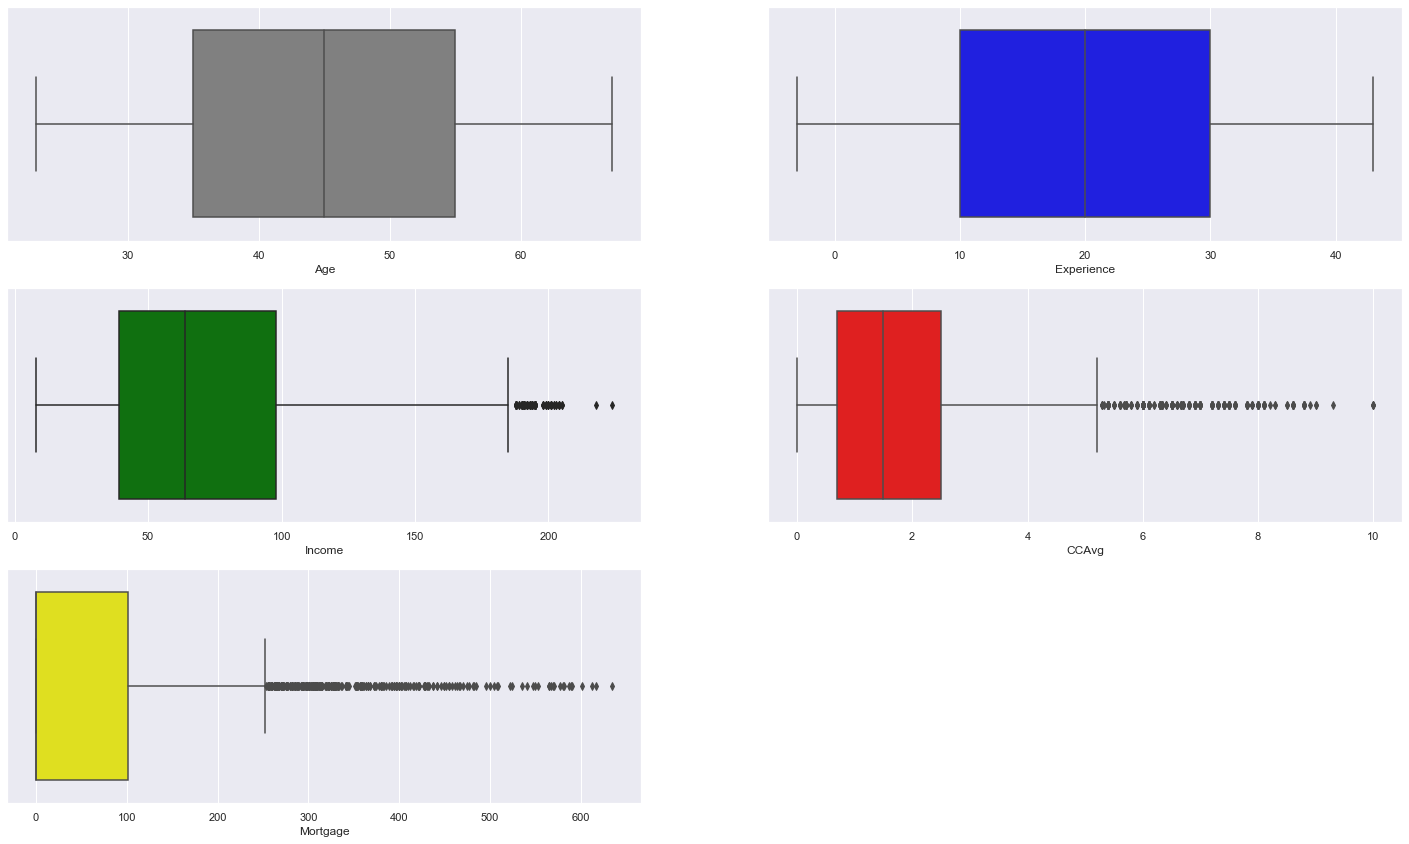

In [23]:
# Let's analyze the continuous variables futher, by looking at their IQRs using box plots
plt.figure(figsize= (25,25))
plt.subplot(5,2,1)
sns.boxplot(x= bank_data.Age, color='grey');

plt.subplot(5,2,2)
sns.boxplot(x= bank_data.Experience, color='blue');

plt.subplot(5,2,3)
sns.boxplot(x= bank_data.Income, color='green');

plt.subplot(5,2,4)
sns.boxplot(x= bank_data.CCAvg, color='red');

plt.subplot(5,2,5)
sns.boxplot(x= bank_data.Mortgage, color='yellow');

#### *Observations* :
1. Age and Experience do not have outliers as such. More customers have experience starting from 11 years to 30 Years and the mean is equal to median. Most of the customers are in the range of 35 to 55 years.
2. Income data is positively right skewed indicating presence of more lower income people in the dataset. Most of the customers have income between 45K and 55K. Also the mean is greater than the median. It seems to have considerable  outliers.
3. Average credit card spending (CCAvg) is right skewed indicating lot of people do not spend significantly on their credit cards. Most of the customers spend less than 2.5K. Considerable outliers are present.
4. Mortgage data is also quite right skewed, with about 70% people having no mortgage. However the max mortgage is 635K. Significant number of outliers are present.
5. Mortgage, CCAvg and Income have outliers that need to be handled while preparing data for modeling.

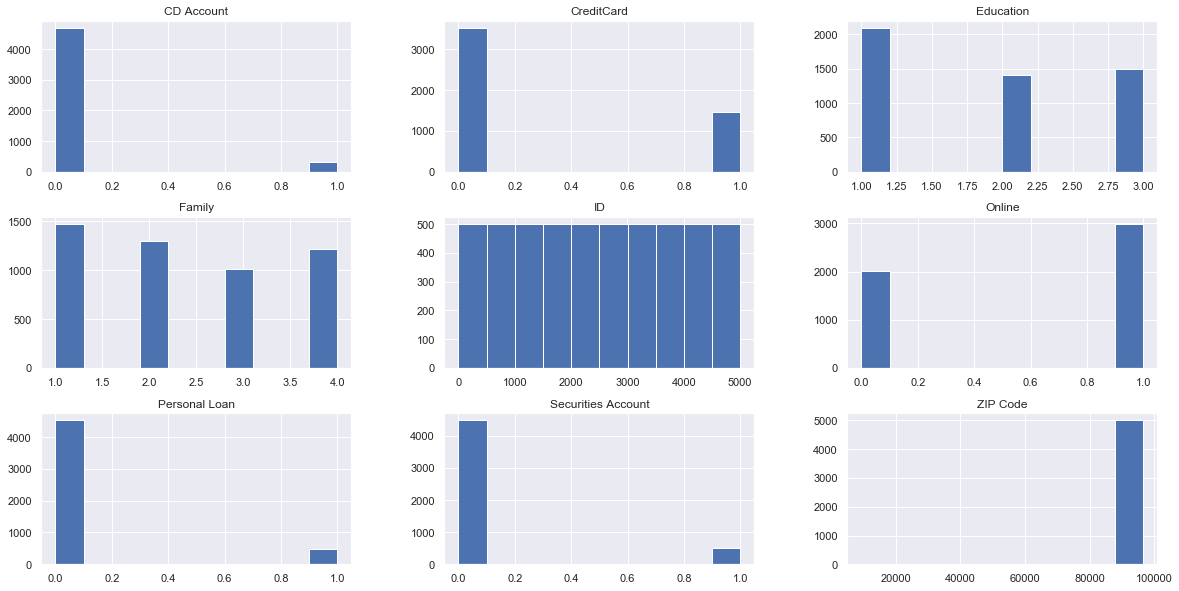

In [24]:
# Let's look at the distributions for categorical variables
bank_data[['ID', 'ZIP Code', 'Family', 'Education', 'Personal Loan', 'Securities Account',
      'CD Account', 'Online', 'CreditCard']].hist(figsize=(20,10));

#### *Observations*:
1. Education and family have ordinal/enumerated values and their distribution is nearly normal.
2. Lot of customers do not have Securities Account and certificate of deposit account. 
3. Also, lot of customers have not opted for personal loans.
4. We can ignore ZIP Code while preparing the data for classification.

##### Bivariate Analysis

Let's look at the correlation between the attributes

In [25]:
# We can neglect ID as it's not adding any value to the analysis
corr_df = bank_data[bank_data.columns.difference(['ID'])].corr()
corr_df

,Age,CCAvg,CD Account,CreditCard,Education,Experience,Family,Income,Mortgage,Online,Personal Loan,Securities Account,ZIP Code
Age,1.000000,-0.052012,0.008043,0.007681,0.041334,0.994215,-0.046418,-0.055269,-0.012539,0.013702,-0.007726,-0.000436,-0.029216
CCAvg,-0.052012,1.000000,0.136534,-0.006689,-0.136124,-0.050077,-0.109275,0.645984,0.109905,-0.003611,0.366889,0.015086,-0.004061
CD Account,0.008043,0.136534,1.000000,0.278644,0.013934,0.010353,0.014110,0.169738,0.089311,0.175880,0.316355,0.317034,0.019972
CreditCard,0.007681,-0.006689,0.278644,1.000000,-0.011014,0.008967,0.011588,-0.002385,-0.007231,0.004210,0.002802,-0.015028,0.007691
Education,0.041334,-0.136124,0.013934,-0.011014,1.000000,0.013152,0.064929,-0.187524,-0.033327,-0.015004,0.136722,-0.010812,-0.017377
Experience,0.994215,-0.050077,0.010353,0.008967,0.013152,1.000000,-0.052563,-0.046574,-0.010582,0.013898,-0.007413,-0.001232,-0.028626
Family,-0.046418,-0.109275,0.014110,0.011588,0.064929,-0.052563,1.000000,-0.157501,-0.020445,0.010354,0.061367,0.019994,0.011778
Income,-0.055269,0.645984,0.169738,-0.002385,-0.187524,-0.046574,-0.157501,1.000000,0.206806,0.014206,0.502462,-0.002616,-0.016410
Mortgage,-0.012539,0.109905,0.089311,-0.007231,-0.033327,-0.010582,-0.020445,0.206806,1.000000,-0.005995,0.142095,-0.005411,0.007383
Online,0.013702,-0.003611,0.175880,0.004210,-0.015004,0.013898,0.010354,0.014206,-0.005995,1.000000,0.006278,0.012627,0.016990


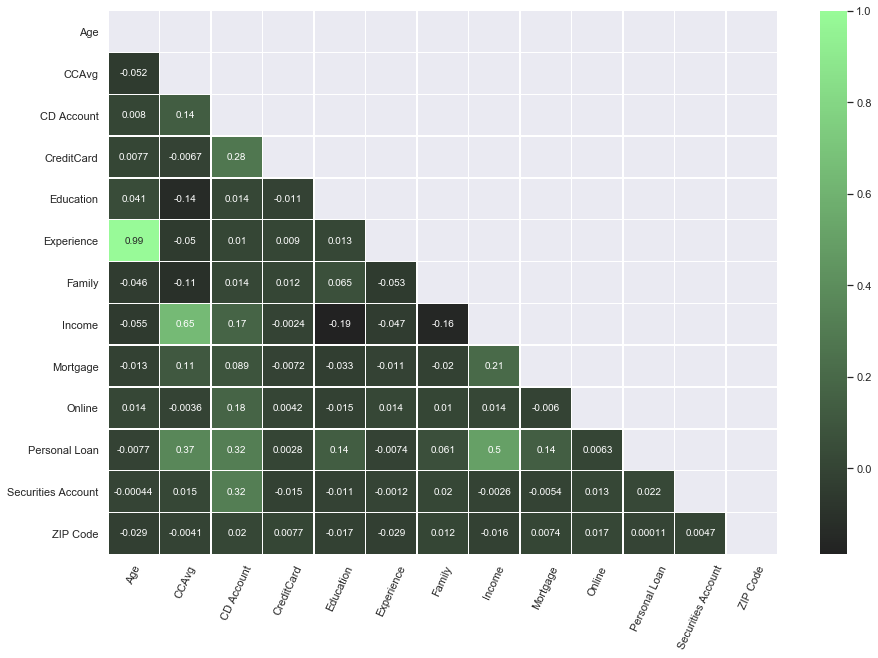

In [26]:
# Let's try to visualize heatmap for the co-relation between attributes.

# Create a mask to hide upper triangle of repeated values
upper_tri_mask = np.zeros_like(corr_df, dtype=np.bool)
upper_tri_mask[np.triu_indices_from(upper_tri_mask)] = True

# Draw the heatmap
plt.figure(figsize=(15,10))
pal = sns.dark_palette("palegreen", as_cmap=True)
pop_hmap = sns.heatmap(corr_df, mask=upper_tri_mask, annot=True, cmap=pal, linewidths=.5)
pop_hmap.set_xticklabels(pop_hmap.get_xticklabels(), rotation=65)
plt.show()

#### *Observations*:
1. Age and Experience have very high positive co-relation. We can neglect one of them while preparing the data for modeling.
2. Income and CCAvg have high positive co-relation. Indicating higher income customers tend to spend more on credit cards.
3. Personal Loan seems to have good positive co-relation with Income. It is also weakly co-related with avg. credit card spending and having certificate of deposit account.
4. Income and Mortgage also have positive linear co-relation. Higher the income more is the mortgage. 

#### Let's look at how numerical variables are related to target attribute (Personal Loan) in two cases: 
1. Loan was opted (Personal Loan = 1) 
2. Loan was not opted (Personal Loan = 0)

In [27]:
# Let's look at the impact of continuous variables on personal loan
bank_data.groupby('Personal Loan')['Age','Experience', 'Income', 'Mortgage', 'CCAvg'].mean()

,Age,Experience,Income,Mortgage,CCAvg
Personal Loan,,,,,
0,45.367257,20.132301,66.237389,51.789381,1.729009
1,45.066667,19.843750,144.745833,100.845833,3.905354


#### *Observations*:
1. Age or Experience doesn't seem to have any relation to acceptance or denial of loans from customers.
2. The average income of customers who opted for loan is over twice that of customers who did not.
3. The average value of a mortgage for customers who opted for loan is double that of customers who did not.
4. The avg. credit card spending for customers who opted for loan is more than twice that of customers who did not.

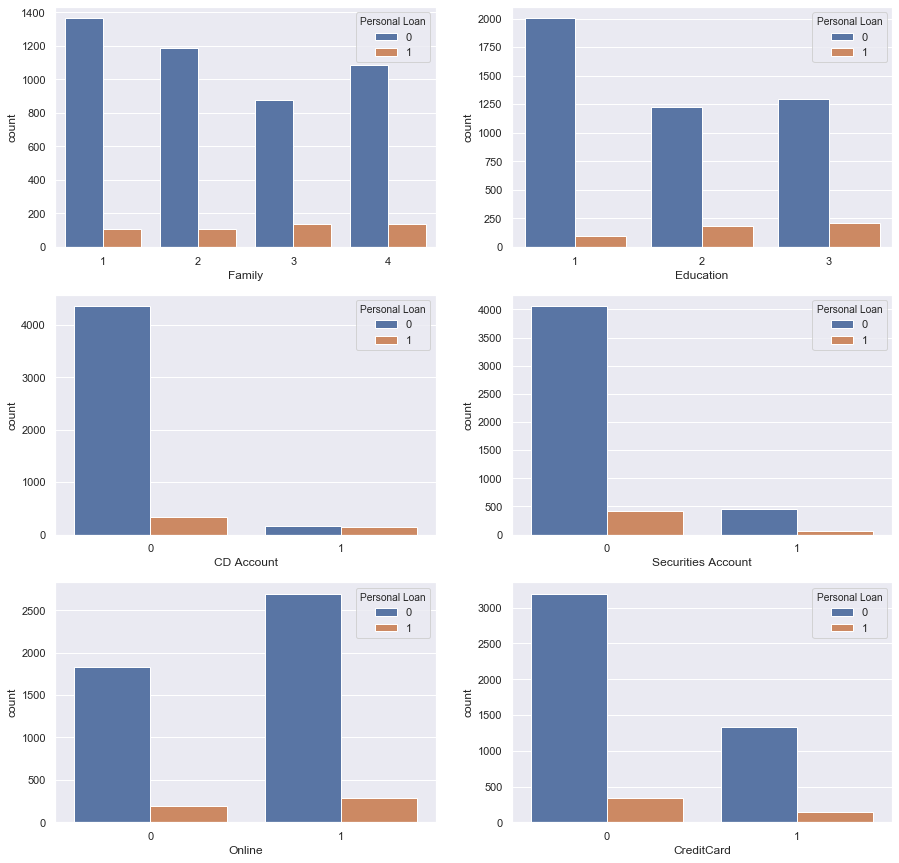

In [28]:
# Let's look at the impact of categorical variables on customers opting for personal loan
cat_variables = ['Family', 'Education', 'CD Account', 'Securities Account', 'Online', 'CreditCard']

plt.figure(figsize=(15, 15))

for loc in range(1, 7):
    plt.subplot(3,2,loc)
    sns.countplot(bank_data[cat_variables[loc-1]], hue=bank_data['Personal Loan']);

#### *Observations*:
1. More customers with larger family size have opted for personal loan.
2. More customers with higher education have opted for personal loan.
3. More customers without certificate of deposit account have opted for personal loan.
4. More customers without securities account have opted for personal loan.
5. More customers with Internet banking have opted for personal loan.
6. More customers without credit cards have opted for personal loan.

Based on above observations, let's look at bi-variabte relationships and its impact on Personal Loan

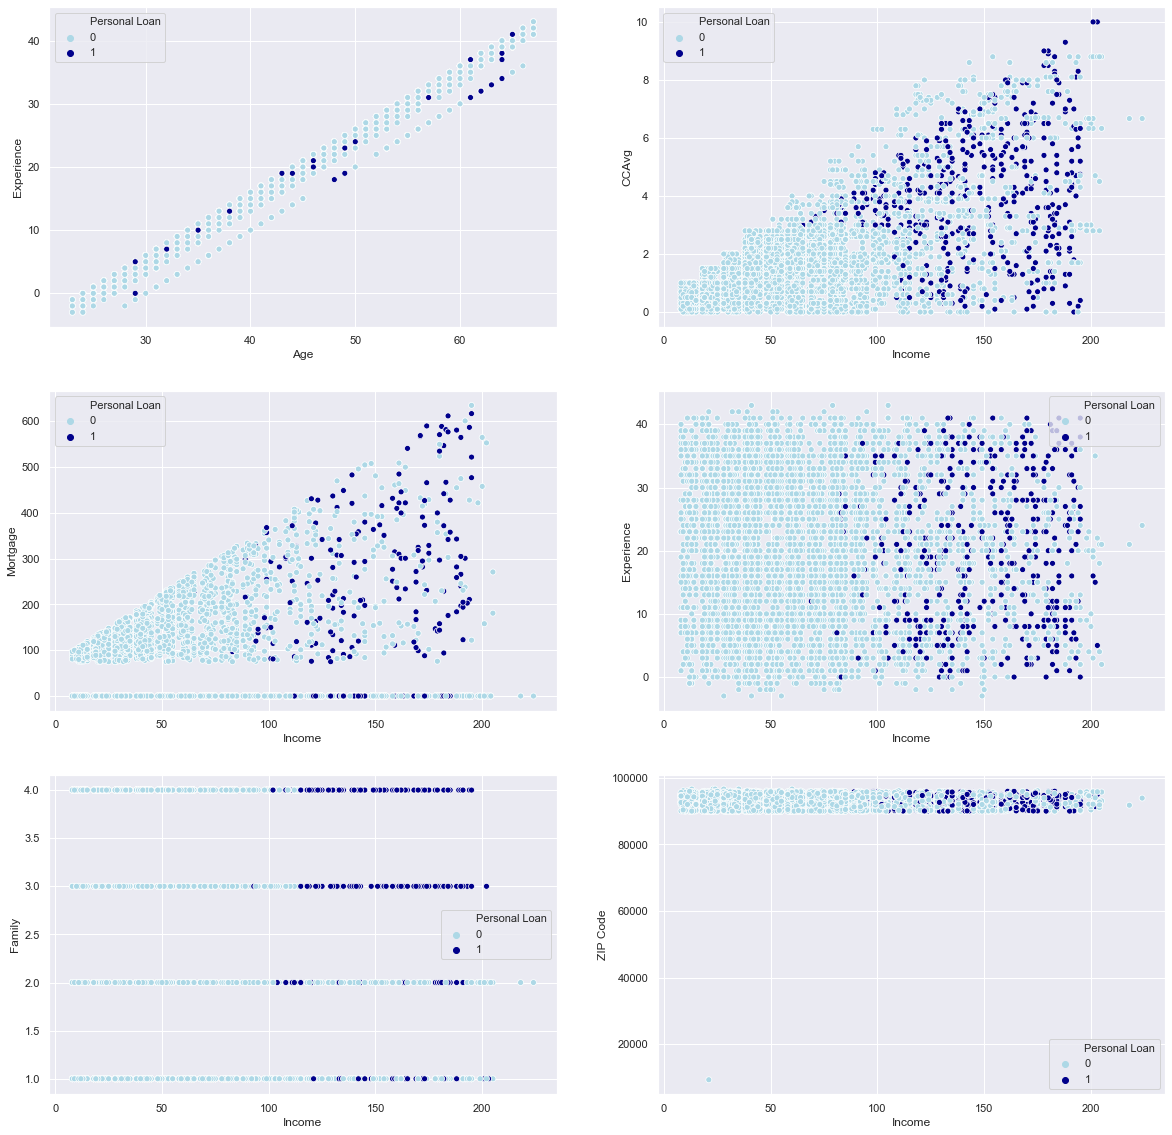

In [29]:
plt.figure(figsize=(20,20))

# Let's look at relationship between Age and Experience and their impact on personal loan
plt.subplot(3,2,1)
sns.scatterplot(bank_data.Age, bank_data.Experience, hue=bank_data['Personal Loan'], 
                palette=['lightblue','darkblue']);

# Let's look at relationship between Income and Avg. credit card spending and their impact on personal loan
plt.subplot(3,2,2)
sns.scatterplot(bank_data.Income, bank_data.CCAvg, hue = bank_data['Personal Loan'], 
                palette=['lightblue','darkblue']);

# Let's look at relationship between Income and Mortgage and their impact on personal loan
plt.subplot(3,2,3)
sns.scatterplot(bank_data.Income, bank_data.Mortgage, hue = bank_data['Personal Loan'],
                palette=['lightblue','darkblue']);

# Let's look at relationship between Income and Experience and their impact on personal loan
plt.subplot(3,2,4)
sns.scatterplot(bank_data.Income, bank_data.Experience, hue = bank_data['Personal Loan'], 
                palette=['lightblue','darkblue'])

# Let's look at relationship between Income and Family size and their impact on personal loan
plt.subplot(3,2,5)
sns.scatterplot(bank_data.Income, bank_data.Family, hue = bank_data['Personal Loan'], 
                palette=['lightblue','darkblue']);

# Let's look at relationship between Income and ZIP Code and their impact on personal loan
plt.subplot(3,2,6)
sns.scatterplot(bank_data.Income, bank_data['ZIP Code'], hue = bank_data['Personal Loan'], 
                palette=['lightblue','darkblue']);

#### *Observations* :
1. Age and Experience has linear relationship but have no direct relationship to personal loan.
2. Higher the Income, higher is the avg. credit card spending and higher the chances of customer opting for personal loan.
3. Higher the Income  higher the mortgage and higher are the chances of opting for personal loan.
4. As experience increases, income increases and thus increases the possibility of customer opting for a personal loan.
5. Families with more people have higher income and with higher income, greater is the chance of customer opting for loan.
6. Irrespective of ZIP Code, people with higher income have personal loans.

### Get data ready for the model

Based on the exploratory data analysis, we prepare the data as follows:
1. Fix the incorrect (negative) values for Experience variable.
2. Remove ID variable as it's not giving any information for predicting if a customer will opt for personal loans.
3. Remove Age variable as it has very high linear co-relation with Experience and we are considering Experience.
4. Remove ZIP Code attribute as all of the data is from few neighboring geographical areas, and not impacting the target variable as such.
5. **One-Hot encode** Family and Education categorical variables.
6. **Feature Scaling and handling outliers**: Income, Mortgage and  avg. credit card spending (CCAvg) is highly skewed and has outliers. We will scale the features using RobustScaler to handle outliers.

In [30]:
# Fix values for Expereince 

# Create a copy of original data for pre-processing
bank_data_fix_exp = bank_data.copy(deep=True)

# Get mean experience per age.
mean_exp_age = bank_data_fix_exp[bank_data_fix_exp.Experience >= 0].groupby('Age').Experience.mean()

# Create look up for {Age : Mean Experience}
mean_exp_age_dict = {x:round(y, 2) for x, y in zip(mean_exp_age.index, mean_exp_age.values)}

# Get overall mean experience (mean and median are almost equal)
mean_exp = bank_data[bank_data.Experience >= 0]['Experience'].mean()

# Replace negative experience values with mean experience of people with same age
for idx, row in bank_data_fix_exp[bank_data_fix_exp.Experience < 0].iterrows():    
    if int(row['Age']) in mean_exp_age_dict:
        # Repalce -ve exp. with median for this age
        bank_data_fix_exp.loc[idx, 'Experience'] =  mean_exp_age_dict[row['Age']]
    else:
        # There is no mean exp. for age 23 since all values are negative
        # In such case, just replace the experience with overall mean experience.
        bank_data_fix_exp.loc[idx, 'Experience'] =  mean_exp

# Ensure there are no negative values
bank_data_fix_exp['Experience'].describe()

count    5000.000000
mean       20.173329
std        11.389616
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [31]:
# Skip ID, Age and ZIP Code variables
bank_data_clean = bank_data_fix_exp.drop(columns=['ID','Age', 'ZIP Code'])

# One-Hot encode Family and Education categorcial variables
bank_data_clean = pd.get_dummies(bank_data_clean, columns=['Family','Education'], drop_first=True)
bank_data_clean.head()

,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
0,1.0,49,1.6,0,0,1,0,0,0,0,0,1,0,0
1,19.0,34,1.5,0,0,1,0,0,0,0,1,0,0,0
2,15.0,11,1.0,0,0,0,0,0,0,0,0,0,0,0
3,9.0,100,2.7,0,0,0,0,0,0,0,0,0,1,0
4,8.0,45,1.0,0,0,0,0,0,1,0,0,1,1,0


In [32]:
# Feature scaling
#
# Get Robust scaler as the centering and scaling statistics of this scaler are based on percentiles 
# and are therefore not influenced by a few number of very large marginal outliers.
#
# Reference: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
robust_scaler = RobustScaler()

# Let's scale countinuous variables for better classification
features_to_scale = ['Income', 'CCAvg', 'Mortgage']

# Scale features using robust scaler
bank_data_clean[features_to_scale] = robust_scaler.fit_transform(bank_data_clean[features_to_scale])

# Quick look at the prepared data
bank_data_clean.head()

,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
0,1.0,-0.254237,0.055556,0.0,0,1,0,0,0,0,0,1,0,0
1,19.0,-0.508475,0.000000,0.0,0,1,0,0,0,0,1,0,0,0
2,15.0,-0.898305,-0.277778,0.0,0,0,0,0,0,0,0,0,0,0
3,9.0,0.610169,0.666667,0.0,0,0,0,0,0,0,0,0,1,0
4,8.0,-0.322034,-0.277778,0.0,0,0,0,0,1,0,0,1,1,0


### 3. Split the data for training and test (70:30) (5 marks)  <a class="anchor" id='3'></a>

In [33]:
# Split independent variables from dependent variable
X = bank_data_clean.drop('Personal Loan', axis=1) # Indpendent variables
Y = bank_data_clean['Personal Loan'] # Class to be pre-dicted (1=True, 0=False)

print("Predictor feature shape: ", X.shape)
print("Target shape: ", Y.shape)

Predictor feature shape:  (5000, 13)
Target shape:  (5000,)


In [34]:
# Let's create train and test datasets.
# Stratify on target variable will keep the representation of target variables consistent across datasets.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42, stratify=Y)

print("{0:0.2f}% data is in training set".format((len(x_train)/len(bank_data_clean)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(bank_data_clean)) * 100))

70.00% data is in training set
30.00% data is in test set


Let's also look at the personal loan true/false ratio in the split data.

In [35]:
# Numbers from origian bank data
orig_total = len(bank_data_clean)
orig_loan = len(bank_data_clean[bank_data_clean['Personal Loan'] == 1])
orig_no_loan = len(bank_data_clean[bank_data_clean['Personal Loan'] == 0])

# Numbers from training data
train_total = len(y_train)
train_loan = len(y_train.loc[y_train[:] == 1])
train_no_loan = len(y_train.loc[y_train[:] == 0])

# Numbers from test data
test_total = len(y_test)
test_loan = len(y_test[y_test[:] == 1])
test_no_loan = len(y_test[y_test[:] == 0])

print("Original personal loan True Values  : {0} ({1:0.2f}%)".format(orig_loan, (orig_loan/orig_total * 100)))
print("Original personal loan False Values : {0} ({1:0.2f}%)".format(orig_no_loan, (orig_no_loan/orig_total * 100)))
print("")

print("Training personal loan True Values  : {0} ({1:0.2f}%)".format(train_loan, (train_loan/train_total * 100)))
print("Training personal loan False Values : {0} ({1:0.2f}%)".format(train_no_loan, (train_no_loan/train_total * 100)))
print("")

print("Testing personal loan True Values   : {0} ({1:0.2f}%)".format(test_loan, (test_loan/test_total * 100)))
print("Testing personal loan False Values  : {0} ({1:0.2f}%)".format(test_no_loan, (test_no_loan/test_total * 100)))
print("")

Original personal loan True Values  : 480 (9.60%)
Original personal loan False Values : 4520 (90.40%)

Training personal loan True Values  : 336 (9.60%)
Training personal loan False Values : 3164 (90.40%)

Testing personal loan True Values   : 144 (9.60%)
Testing personal loan False Values  : 1356 (90.40%)



### 4. Use Logistic Regression to predict and print all metrics  (15 marks)  <a class="anchor" id='4'></a>

Let's use stats model to identify significant independent variables.

In [36]:
# (Reference: Case study from mentor learning session)
# Logistic Regression using stats model
logit_model = sm.Logit(y_train, sm.add_constant(x_train))

# Fit the model using maximum likelyhood
logit_trained = logit_model.fit()

# Print summary
logit_trained.summary()

Optimization terminated successfully.
         Current function value: 0.115524
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3486
Method:                           MLE   Df Model:                           13
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.6347
Time:                        15:49:53   Log-Likelihood:                -404.33
converged:                       True   LL-Null:                       -1106.7
Covariance Type:            nonrobust   LLR p-value:                1.447e-292
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -8.3057      0.487    -17.072      0.000      -9.259      -7.352
Experience             0.0023      0.008      0.278      0.781      -0.014       0.018
Income                 3.5695      0.212     16.869      0.000       3.155       3.984
CCAvg                  0.3908      0.098      3.991      0.000       0.199       0.583
Mortgage               0.1488      0.073      2.024      0.043       0.005       0.293
Securities Account    -0.8558      0.380     -2.251      0.024      -1.601      -0.111
CD Account             3.7963      0.424      8.962      0.000       2.966       4.627
Online                -0.7684      0.202     -3.813      0.000      -1.163      -0.373
CreditCard            -1.0436      0.269     -3.883      0.000      -1.570      -0.517
Family_2              -0.2360      0.278     -0.850      0.395      -0.780       0.308
Family_3               1.9517      0.297      6.567      0.000       1.369       2.534
Family_4               1.6116      0.283      5.686      0.000       1.056       2.167
Education_2            3.8947      0.330     11.793      0.000       3.247       4.542
Education_3            4.0172      0.327     12.287      0.000       3.376       4.658
======================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [37]:
# (Reference: Case study from mentor learning session)

# Get coefficients of variables
lgcoef = pd.DataFrame(logit_trained.params, columns=['coef'])

# Add odds ratio as exponent of coefficients
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)

# Add probabilities
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval'] = logit_trained.pvalues
pd.options.display.float_format = '{:.2f}'.format

# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)

# Filter key independent variables based on p-values
pval_filter = lgcoef['pval'] <= 0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
Education_3,4.02,55.55,0.98,0.00
Education_2,3.89,49.14,0.98,0.00
CD Account,3.80,44.54,0.98,0.00
Income,3.57,35.50,0.97,0.00
Family_3,1.95,7.04,0.88,0.00
Family_4,1.61,5.01,0.83,0.00
CCAvg,0.39,1.48,0.60,0.00
Mortgage,0.15,1.16,0.54,0.04
Online,-0.77,0.46,0.32,0.00
Securities Account,-0.86,0.42,0.30,0.02


#### *Observation*:
Potential key independent variables impacting target variable 'Personal Loan', are: 

Education, Family, Income, CCAvg, Mortgage, Online, Securities Account and CreditCard.


### Logistic Regression using sklearn

In [38]:
#
# Simpe classifier that uses sklearn's logistic regression model
#
# Helps experimenting with different model parameters and datasets
#
class Classifier:
    '''
        A helper class that encapsulates a LinearRegression model and the datasets on which the model
        intends to learn (training data) and predict (test data)

        Shows several performance metrics of the model on the given data.

        Also helps to quickly update the model and the datasets inorder to experiment with 
        different model parameters and datasets. This encapsulation will help assessing 
        different models in a modularized way.
    '''
    def __init__(self, x_train, x_test, y_train, y_test, model):
        '''
            Contruct instance of the classifier
            x_train, y_train: Training data, train labels
            x_test, y_test: Test data, test labels
            model: Model for classification
        '''
        self.model  = model
        self.xtrain = x_train
        self.xtest  = x_test
        self.ytrain = y_train        
        self.ytest  = y_test
        self.ypred  = None   # predicted outputs      
        self.has_infered = False # Indicator for inference
        
    def __str__(self):
        '''
            String representation of classifier
        '''
        s = self.model.__str__() + "\n"
        s += "Number of independent variables: " + str(self.xtrain.shape[1]) + "\n"
        s += "Train inputs : " + str(self.xtrain.shape) + "\n"
        s += "Train labels : " + str(self.ytrain.shape) + "\n"
        s += "Test inputs  : " + str(self.xtest.shape)  + "\n"
        s += "Test labels  : " + str(self.ytest.shape)  + "\n"
        return s
    
    def set_model(self, model):
        '''
            Method to update classifier
            model : classifier instance
        '''
        self.model = model
        self.ypred = None
        self.has_infered = False
        
    def set_data(self, x_train, x_test, y_train, y_test):
        '''
            Method to reset the train and test data
            x_train, y_train: Training data, train labels
            x_test, y_test: Test data, test labels
        '''
        self.xtrain = x_train
        self.ytrain = y_train
        self.xtest = x_test
        self.ytest = y_test
        self.ypred = None
        self.has_infered = False
    
    def inference(self):
        '''
            Method to learn on the training data and predit on the test data
        '''
        if self.has_infered:
            return 
        
        self.model.fit(self.xtrain, self.ytrain)
        self.ypred = self.model.predict(self.xtest)
        self.has_infered = True
        
    
    def draw_confusion_matrix(self, title, classes=["Positive", "Negative"]):
        '''
            Method to compute and draw confusion matrix
            title: title of the confusion matrix figure
            classes: binary classification classes
        '''
        self.inference()
        
        # Get confusion matrix as a dataframe
        cm = metrics.confusion_matrix(self.ytest, self.ypred, labels=[1, 0])
        cm_df = pd.DataFrame(cm, index=classes, columns=classes)

        # Plot the matrix
        plt.figure(figsize=(10,7))
        sns.heatmap(cm_df, annot=True, linewidths=0.3, annot_kws={"fontsize":15}, fmt='g')
        plt.title(title)
        plt.xlabel("Predicted")
        plt.ylabel("Truth")
        plt.show()
    
    def print_report(self, desc=''):
        '''
            Method to print classification report
            desc: Descrition for the report
        '''
        self.inference()
        print(desc,"\n") 
        print(metrics.classification_report(self.ytest, self.ypred))
        
    def draw_roc_curve(self, title="ROC Curve"):
        '''
            Method to plot receiver operator characteristic curve
            title: Title for the plot
        '''
        self.inference()
        
        # Get false positive rate and true positive rate. We can skip thresholds
        fpr, tpr, _ = metrics.roc_curve(self.ytest, self.model.predict_proba(self.xtest)[:,1])

        # Get area under the curve
        roc_auc = metrics.roc_auc_score(self.ytest, self.ypred)

        # Plot ROC and area under the curve.
        plt.figure(figsize=(10,7))
        
        # Plot false positive rate agains true positive rate.
        plt.plot(fpr, tpr, label='Logistic Regression [area under curve (auc): {0}]'.format(round(roc_auc, 2)))

        # plot positive diagonal
        plt.plot([0, 1], [0, 1],'g--')

        # Set labels, title and legend location
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title)
        plt.legend(loc="lower right")
        plt.show()
    
    def draw_precision_recall_curve(self, title='Precision-Recall curve'):
        '''
            Method to plot precision-recall curve
            title: Title for the plot
        '''
        if not self.has_infered:
            self.inference()
        
        curve = metrics.plot_precision_recall_curve(self.model, self.xtest, self.ytest,
                                                       response_method='predict_proba')
        curve.ax_.set_title(title)
        curve.figure_.set_figwidth(10)
        curve.figure_.set_figheight(7)
               
    
    def draw_precision_recall_vs_thresh(self, title='Precision-Recall vs Threshold'):
        '''
            Method to plot precision-recall vs threshold curve
            title: Title for the plot
        '''
        if not self.has_infered:
            self.inference()
        
        y_probs = self.model.predict_proba(self.xtest)
        pre, rec, tre = metrics.precision_recall_curve(self.ytest, y_probs[:,1])
        plt.figure(figsize=(10,7))
        plt.plot(tre, pre[:-1], 'b:', label='Precision')
        plt.plot(tre, rec[:-1], 'g:', label = 'Recall')
        plt.xlabel('Threshold')
        plt.title(title)
        plt.legend(loc='top right')
        plt.ylim([0,1])
    
    def get_perf_dict(self, conf_mat=True, acc=True, roc_auc=True, prf=True):
        '''
            Method to get key performance metrics for a model
            conf_mat: Get confusion matrix details
            acc: get train and test accuracies
            roc_auc: get roc area under the curve
            prf: get precision, recall and f1-score
        '''
        self.inference()
        
        perf_dict = {}
        # Get confusion matrix details
        if conf_mat:
            cm = metrics.confusion_matrix(self.ytest, self.ypred, labels=[1, 0])
            tp, tn, fp, fn = cm[0][0], cm[1][1], cm[1][0], cm[0][1] 
            perf_dict['True Positives'] = tp
            perf_dict['True Negatives'] = tn
            perf_dict['False Positives'] = fp
            perf_dict['False Negatives'] = fn
        
        # Get train and test accuracies
        if acc:
            train_score = self.model.score(self.xtrain, self.ytrain)
            test_score  = self.model.score(self.xtest, self.ytest)
            perf_dict['Train Accuracy'] = round(train_score*100.0, 3)
            perf_dict['Test Accuracy'] = round(test_score*100.0, 3)
        
        # Get area under the curve
        if roc_auc:
            roc_auc = metrics.roc_auc_score(self.ytest, self.ypred)
            perf_dict['ROC AUC'] = round(roc_auc, 3)
        
        # Get precision, recall and f1-score
        if prf:
            ps = metrics.precision_score(self.ytest, self.ypred)
            rs = metrics.recall_score(self.ytest, self.ypred)
            f1_score = metrics.f1_score(self.ytest, self.ypred, average='macro')
            perf_dict['Percision Score'] = round(ps, 3)
            perf_dict['Recall Score'] = round(rs, 3)
            perf_dict['F1-score'] = round(f1_score, 3)
        
        return perf_dict
        

# (reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
# Create instance of logistic regression with some parameter values.
# We will tune these parameters in the next section inorder to get a better model
base_model = LogisticRegression(solver='saga', C=0.2, penalty='l1')
classifier = Classifier(x_train, x_test, y_train, y_test, model=base_model)
print(classifier)

LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
Number of independent variables: 13
Train inputs : (3500, 13)
Train labels : (3500,)
Test inputs  : (1500, 13)
Test labels  : (1500,)



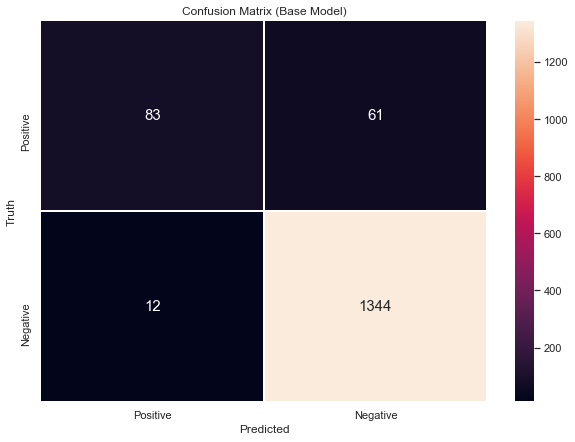

In [39]:
# Let's look at the confusion matrix:
classifier.draw_confusion_matrix(title='Confusion Matrix (Base Model)')

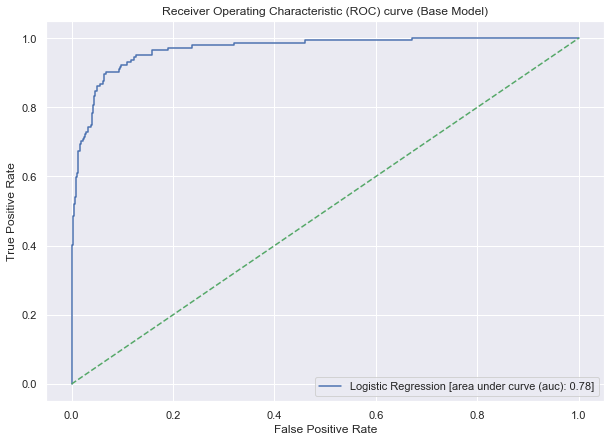

In [40]:
# Let's look at the receiver operating curve
classifier.draw_roc_curve(title='Receiver Operating Characteristic (ROC) curve (Base Model)')

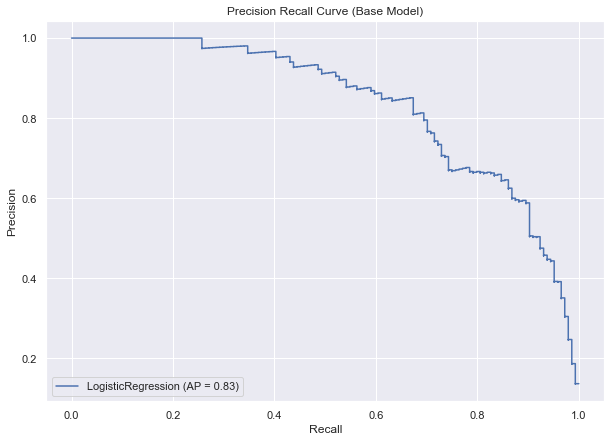

In [41]:
# Let's look at the Precision-Recall Curve
classifier.draw_precision_recall_curve(title='Precision Recall Curve (Base Model)')

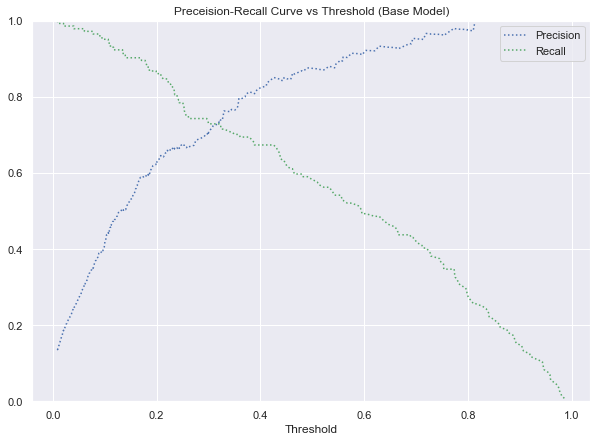

In [42]:
# Let's look at the impact of threashold on precision and recall
classifier.draw_precision_recall_vs_thresh(title='Preceision-Recall Curve vs Threshold (Base Model)')

In [43]:
# Let's look the the classification summary
classifier.print_report()

 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.87      0.58      0.69       144

    accuracy                           0.95      1500
   macro avg       0.92      0.78      0.83      1500
weighted avg       0.95      0.95      0.95      1500



In [44]:
# Let's look at the performance summary of the base model
print("Performance Summary:")
base_model_perf = classifier.get_perf_dict()
model_perf_df = pd.DataFrame(base_model_perf, index=['Base Model Performance'])
model_perf_df.T

Performance Summary:


,Base Model Performance
True Positives,83.00
True Negatives,1344.00
False Positives,12.00
False Negatives,61.00
Train Accuracy,95.03
Test Accuracy,95.13
ROC AUC,0.78
Percision Score,0.87
Recall Score,0.58
F1-score,0.83


#### *Observations for Base Model*:
1. True Positives (TP): we correctly predicted 83 customers will opt for personal loan.
2. True Negatives (TN): we correctly predicted 1344 customers will not opt for loan.
3. False Positives (FP)("Type I error") : we incorrectly predicted that 12 customers will opt for a loan.
4. False Negatives (FN)("Type II error") : we incorrectly predicted that 61 customers will not opt for a loan.
5. Train accuracy is 95.03 while test accuracy is 95.13. They are fairly close, indicating there is no case of over-fitting or under-fitting on the datasets.
6. Area under curve (auc) is 0.78 and Average Precision is 0.87, indicating reasonable classification performance. 
7. Precision seems to be good however, recall is pretty low, indicating presence of more false negatives.
8. Precision and recall for positive classification is lower than that for negative classification.
9. As the threshold is increased, the recall increases but precision decreases. The model's default threshold is 0.5, but can be adjusted to ~0.35 to get better recall with slightly reduced precision.

### 5. Reasoning on how can the model perform better  (10 marks)  <a class="anchor" id='5'></a>

Let's evaluate our model based on different parameters. 

In [45]:
# Let's look at the model parameters
params_df = pd.DataFrame(classifier.model.get_params(), index = ['parameters'])
params_df

,C,class_weight,dual,fit_intercept,intercept_scaling,l1_ratio,max_iter,multi_class,n_jobs,penalty,random_state,solver,tol,verbose,warm_start
parameters,0.20,None,False,True,1,None,100,auto,None,l1,None,saga,0.00,0,False


Let's start with evaluating the solver. These are choices we have:  newton-cg, lbfgs, liblinear, sag and saga.

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [46]:
# Update train and test data for the classifier
classifier.set_data(x_train, x_test, y_train, y_test)

# Now, let's evaluate the solvers
#
# The ‘newton-cg’, ‘sag’, and ‘lbfgs’ solvers support only L2 regularization with primal formulation, 
# or no regularization. The default penalty is l2.
#
# liblinear support both l1 and l2 regularization and saga supports l1, l2 as well as elasticnet as penalties.
# 
solvers = {'newton-cg': {'solver':'newton-cg', 'penalty':'l2', 'l1_ratio':None},
           'lbfgs' : {'solver':'lbfgs', 'penalty':'l2', 'l1_ratio':None},
           'sag': {'solver':'sag', 'penalty':'l2', 'l1_ratio':None},
           'liblinear (l1)': {'solver':'liblinear', 'penalty':'l1', 'l1_ratio':None},
           'liblinear (l2)': {'solver':'liblinear', 'penalty':'l2', 'l1_ratio':None},
           'saga (l1)': {'solver':'saga', 'penalty':'l1', 'l1_ratio':None},
           'saga (l2)': {'solver':'saga', 'penalty':'l2', 'l1_ratio':None},
           'saga (elasticnet)': {'solver':'saga', 'penalty':'elasticnet', 'l1_ratio':0.5}
          }

# Get performance for each solver
perf_list = []
perf_index = []
for name, params in solvers.items():
    classifier.set_model(LogisticRegression(random_state=42, solver=params['solver'], 
                                            penalty=params['penalty'], l1_ratio=params['l1_ratio']))
    perf_list.append(classifier.get_perf_dict(conf_mat=False))
    perf_index.append(name)
    

# Data frame to display performance results 
solvers_perf_df = pd.DataFrame(perf_list, index=perf_index, dtype=str) # dype=str to avoid rounding off decimals.
solvers_perf_df.T

,newton-cg,lbfgs,sag,liblinear (l1),liblinear (l2),saga (l1),saga (l2),saga (elasticnet)
Train Accuracy,95.857,95.857,95.571,95.943,95.886,95.2,95.257,95.229
Test Accuracy,96.2,96.2,95.867,96.2,95.933,95.467,95.4,95.533
ROC AUC,0.839,0.839,0.819,0.842,0.822,0.801,0.795,0.801
Percision Score,0.892,0.892,0.894,0.885,0.895,0.88,0.887,0.889
Recall Score,0.688,0.688,0.646,0.694,0.653,0.611,0.597,0.611
F1-score,0.878,0.878,0.864,0.879,0.866,0.848,0.844,0.85


#### *Observations*:
1. All of the solvers perform better upon feature scaling. Their overall classification performance is very close.
2. We will focus on roc auc and f1-score (weighted average of precision and recall), to select best solver.
3. liblinear solver with l1 penalty has the highest roc auc and f1-score. It also has the highest recall (implying less false negatives.)
4. Although all the solvers performed very close, in-order to select one, let's select liblinear solver with l1 penalty.

Choosing solver as liblinear with l1 penalty, we consider following parameters:

(Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

1. **dual**: Dual or primal formulation is only implemented for l2 penalty with liblinear solver, so we can skip it.
2. **tol**: Tolerance for stopping criteria can be set to default (1e-4)
3. **fit_intercept**: We would like to add the intercept to the decision function and can set this to default (true).
4. **intercept_scaling**: Used when solver is liblinear, so we can leave this default (true).
5. **random_state**: This can be set to a constant value, to get consistent shuffling.
6. **max_iter**: The number of iterations take for the solver to converge can be set to (default) 100. For given dataset 100 iterations seems reasonable for the solver to converge.
7. **multi_class**: 'auto' option seems to select the correct value based on data. So, let's leave this to default (auto).
8. **verbose**: We can leave this to default (0) to avoid unwanted outputs.
9. **warm_start**: We don't want to use the solution to previous call to fit(), hence can be set to (default) false.
10. **n_jobs**: Number of CPU cores when parallelizing over classes. This can be left to default as this is ignored for liblinear solver.
11. **l1_ratio**: This is applicable only when the penalty is set to 'elasticnet'. So, we can set this to default.

Now, we are left with experimenting with two parameters, namely:
1. **C**: Inverse regularization strength. Small values specify strong regularization.
2. **class_weight**: By default uniform, can be set to 'balanced' - uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as (n_samples / (n_classes * np.bincount(y))

In [47]:
# Let's assess the imapct of C values on the model

# Degrees of regularization - smaller the value higher the regularization
C_list = [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1]

perf_list = []
perf_index = []
for c in C_list:
    classifier.set_model(LogisticRegression(random_state=42, solver='liblinear', penalty='l1', C=c))
    perf_list.append(classifier.get_perf_dict(conf_mat=False))
    perf_index.append('C=' + str(c))
    
# Data frame to display performance results 
reg_perf_df = pd.DataFrame(perf_list, index=perf_index, dtype=str) # type=str to avoid rounding off decimals.
reg_perf_df.T

,C=0.001,C=0.01,C=0.1,C=0.25,C=0.5,C=0.75,C=1
Train Accuracy,90.4,90.343,95.086,95.657,95.8,95.943,95.943
Test Accuracy,90.4,90.0,95.267,95.867,96.0,96.133,96.2
ROC AUC,0.5,0.547,0.794,0.816,0.829,0.836,0.842
Percision Score,0.0,0.421,0.869,0.902,0.889,0.891,0.885
Recall Score,0.0,0.111,0.597,0.639,0.667,0.681,0.694
F1-score,0.475,0.561,0.841,0.863,0.87,0.875,0.879


#### *Observations*:
1. As the degree of regularization decreases (C value increases), the performance of model improves.
2. We can keep the C value to 1, indicating no regularization.

In [48]:
# Let's assess the impact of 'class_weight' on the model
class_weights = ['balanced', None]

perf_list = []
perf_index = []
for w in class_weights:
    classifier.set_model(LogisticRegression(random_state=42, solver='liblinear', penalty='l1', C=1, class_weight=w))
    perf_list.append(classifier.get_perf_dict(conf_mat=False))
    perf_index.append('uniform' if w == None else w)
    
# Data frame to display performance results 
class_perf_df = pd.DataFrame(perf_list, index=perf_index, dtype=str) # type=str to avoid rounding off decimals.
class_perf_df.T

,balanced,uniform
Train Accuracy,90.429,95.943
Test Accuracy,91.267,96.2
ROC AUC,0.918,0.842
Percision Score,0.526,0.885
Recall Score,0.924,0.694
F1-score,0.81,0.879


#### *Observations*:
1. Although the recall and area under the curve has increased with 'balanced' class weights, precision and accuracies have decreased significantly.
1. Keeping class_weight default (uniform/None) yields better classification performance.
2. Our updated LogisticRegression model can have liblinear solver with l1 penalty and no regularization (C=1).

#### Let's look at the performance of the new model 

In [49]:
# So, our updated model can be defined as follows
updated_model = LogisticRegression(solver='liblinear', penalty='l1', C=1, class_weight=None)

# Let's look at the performance of the new model.
classifier.set_model(updated_model) # Update model
classifier.set_data(x_train, x_test, y_train, y_test)
print(classifier)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Number of independent variables: 13
Train inputs : (3500, 13)
Train labels : (3500,)
Test inputs  : (1500, 13)
Test labels  : (1500,)



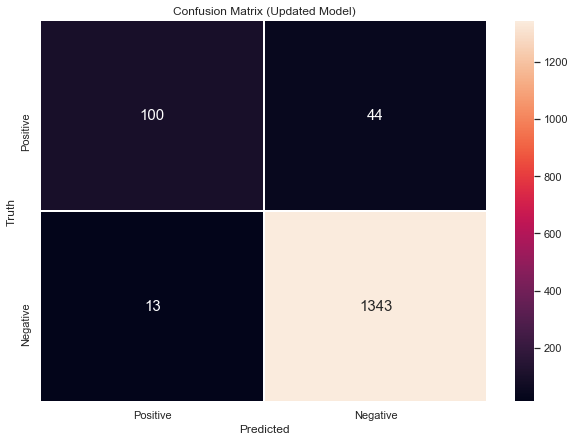

In [50]:
# Let's look at the confusion matrix:
classifier.draw_confusion_matrix(title='Confusion Matrix (Updated Model)')

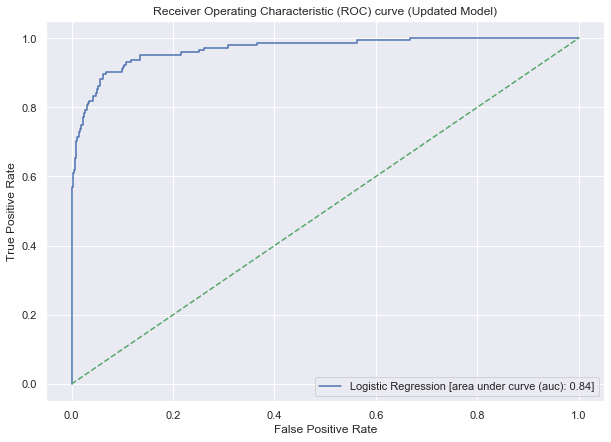

In [51]:
# Let's look at the receiver operating curve
classifier.draw_roc_curve(title='Receiver Operating Characteristic (ROC) curve (Updated Model)')

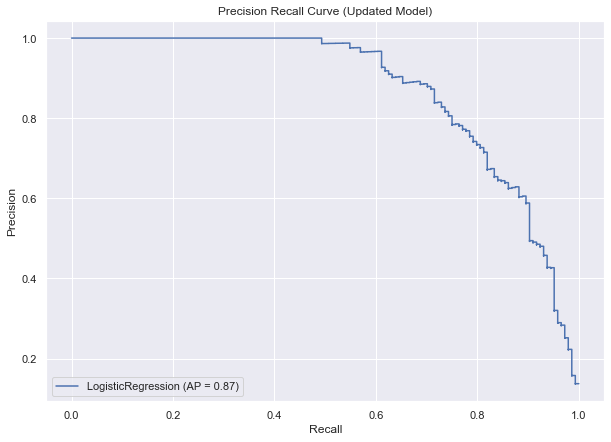

In [52]:
# Let's look at the Precision-Recall Curve
classifier.draw_precision_recall_curve(title='Precision Recall Curve (Updated Model)')

In [53]:
# Let's look the the classification summary
classifier.print_report()

 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1356
           1       0.88      0.69      0.78       144

    accuracy                           0.96      1500
   macro avg       0.93      0.84      0.88      1500
weighted avg       0.96      0.96      0.96      1500



In [54]:
# Let's compare performance of the updated model to the base model.

# Get performance numbers for base model
classifier.set_model(base_model)
base_model_perf_dict = classifier.get_perf_dict()

# Get performance numbers for updated model.
classifier.set_model(updated_model)
updated_model_perf_dict = classifier.get_perf_dict()

# Merge perfrormance numbers of base and updated model.
merged_perf_dict = {}
for key in base_model_perf_dict.keys():
    merged_perf_dict[key] = []
    merged_perf_dict[key].extend([base_model_perf_dict[key], updated_model_perf_dict[key]])

merged_perf_df = pd.DataFrame(merged_perf_dict, index=['Base Model', 'Updated Model'])
merged_perf_df.T


,Base Model,Updated Model
True Positives,83.00,100.00
True Negatives,1344.00,1343.00
False Positives,12.00,13.00
False Negatives,61.00,44.00
Train Accuracy,95.03,95.94
Test Accuracy,95.13,96.20
ROC AUC,0.78,0.84
Percision Score,0.87,0.89
Recall Score,0.58,0.69
F1-score,0.83,0.88


#### *Observations*:
1. Updated model show improvements over base model. Since, the features are already scaled, the performance difference is not too high.
2. The updated model with liblinear solver with l1 penalty and no regularization yielded the best f1-score, recall (sensitivity) and area under the curve (classification performance).
3. Feature Scaling helped improve performance of all solvers and is an essential step in the data analysis.
4. Solver, penalty and degree of regularization, turned out key parameters to be tuned in order to get the best classifier.
5. We will associate the performance of the updated model to business use case in next section.

### 6. Business understanding of the improved model (5 marks)  <a class="anchor" id='6'></a>

The Thera bank wants to devise campaigns with better target marketing to increase the success ratio with a minimal budget. Let's consider the costs of Type I error (False Positives) and Type II error (False Negatives) in this context.

**Cost of Type I error (False Positive) = Cost of incorrectly targeting a liability customer for marketing.**

(Bank targets a liability customer and the customer does not purchase a personal loan. Unreasonable increased budget!)

**Cost of Type II error (False Negative) = Cost of losing a potential liability customer.**

(Bank choses not to target a liability customer, for marketing. But, if targeted, the customer would have purchased a personal loan and would be retained as depositor. A customer lost!)

A brute force approach will be to target all potential customers, but this would result in exorbitant budget. Ideally, we would like to have zero Type I and II errors. But, that's not realistic.

Let's assume that the cost of Type I error is much smaller than that of Type II. That is, we assume cost of incorrectly targeting a liability customer for marketing, is much smaller than that of losing the customer. This is a fair assumption, as with today's digital media platforms and advertisements, the cost of target marketing can be reduced significantly. With this assumption, it makes more sense to reduce Type II errors, as much as possible. Which means the model with highest recall (sensitivity) will be beneficial. Our improved model shows significant increase in the recall over the base model and will be suitable in this case. 

However, for whatever reason, if we assume the cost of Type I error is larger than Type II error. That is, we assume the cost of incorrectly targeting a liability customer for marketing, is much larger than that of losing a liability customer. Then, we would like to minimize the Type I errors. In such case, a model with high precision would be beneficial. Our  improved model has gained highest possible precision based on scaled data and model parameters, resulting into a better choice in this case too.

In order to precisely target liability customers for marketing, the bank should focus on customers with higher income higher education, good amount of existing mortgage. The bank can moderately focus on liability customers with Internet banking, without securities account, certificate of deposit account and credit cards.

**Thoughts on further model improvements**:
We need to get more data to improvise the accuracy, precision and recall of the model. Perhaps collecting data from more geographical locations will be helpful. Data pertaining to - *customer's credit score, kind of profession, gender, marital status, number of dependents, has the customer defaulted on previous personal loans* is missing in the current dataset. However, it will valuable in improving the model.
